In [136]:
# required imports

import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [137]:
fp = r'../assets/map_data/india-polygon.shp'
map_df = gpd.read_file(fp)

In [138]:
df = pd.read_csv("../assets/data/cleaned_data.csv")

In [139]:
state_mapping = {
    'Andaman_&_Nicobar_Islands' : "Andaman and Nicobar Islands", 
    'Andhra_Pradesh' : 'Andhra Pradesh', 
    'Arunachal_Pradesh' : 'Arunachal Pradesh' ,
    'Assam' : 'Assam',
    'Bihar' : 'Bihar', 
    'Chandigarh' : 'Chandigarh', 
    'Chhattisgarh' : 'Chhattisgarh',
    'Dadra_&_Nagar_Haveli' : 'Dadra and Nagar Haveli' ,
    'Daman_&_Diu' : 'Daman and Diu',
    'Delhi' :  'Delhi',
    'Goa' :'Goa', 
    'Gujarat' : 'Gujarat',
    'Haryana' : 'Haryana', 
    'Himachal_Pradesh' : 'Himachal Pradesh', 
    'Jammu_&_Kashmir' : 'Jammu and Kashmir', 
    'Jharkhand' : 'Jharkhand',
    'Karnataka' : 'Karnataka', 
    'Kerala' : 'Kerala',
    'Lakshadweep' : 'Lakshadweep', 
    'Madhya_Pradesh' : 'Madhya Pradesh',
    'Maharashtra' : 'Maharashtra', 
    'Manipur' : 'Manipur', 
    'Meghalaya' : 'Meghalaya', 
    'Mizoram' : 'Mizoram',
    'Nagaland' : 'Nagaland',
    'Odisha' : 'Odisha',
    'Puducherry' : 'Puducherry', 
    'Punjab' : 'Punjab', 
    'Rajasthan' : 'Rajasthan', 
    'Sikkim' : 'Sikkim',
    'Tamil_Nadu' : 'Tamil Nadu', 
    'Telangana' : 'Telangana', 
    'Tripura' : 'Tripura', 
    'Uttar_Pradesh' : 'Uttar Pradesh',
    'Uttarakhand':'Uttarakhand', 
    'West_Bengal' : 'West Bengal',
    'Dadra & Nagar Haveli And Daman & Diu' : 'Daman and Diu', 
    'Goa,_Daman_&_Diu' : 'Goa',
    'Mysore' : 'Karnataka' , 
    'Madras' : 'Tamil Nadu'
}


In [140]:
df['State'] = df['State_Name'].map(state_mapping)
# henceforth, must append Ladakh

In [141]:
margin_df = df.groupby('State')['Margin_Percentage'].mean().reset_index()
margin_df = margin_df.rename(columns={'Margin_Percentage': 'Average_Margin'})

In [142]:
margin_df

,State,Average_Margin
0,Andaman and Nicobar Islands,5.773966
1,Andhra Pradesh,4.796599
2,Arunachal Pradesh,10.653168
3,Assam,5.416224
4,Bihar,3.734431
5,Chandigarh,1.977550
6,Chhattisgarh,3.236471
7,Dadra and Nagar Haveli,7.743750
8,Daman and Diu,8.393333
9,Delhi,2.034167


add ladakh

In [143]:
new_row = {
    'State': 'Ladakh',
    'Average_Margin': margin_df.loc[margin_df['State'] == 'Jammu and Kashmir', 'Average_Margin'].iloc[0]
}

# Append the new row to the DataFrame
margin_df = margin_df.append(new_row, ignore_index=True)

/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_85602/3234373488.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  margin_df = margin_df.append(new_row, ignore_index=True)


In [144]:
margin_df

,State,Average_Margin
0,Andaman and Nicobar Islands,5.773966
1,Andhra Pradesh,4.796599
2,Arunachal Pradesh,10.653168
3,Assam,5.416224
4,Bihar,3.734431
5,Chandigarh,1.977550
6,Chhattisgarh,3.236471
7,Dadra and Nagar Haveli,7.743750
8,Daman and Diu,8.393333
9,Delhi,2.034167


In [145]:
merged = map_df.set_index('st_nm').join(margin_df.set_index('State'))

<Axes: title={'center': 'Deaths'}>

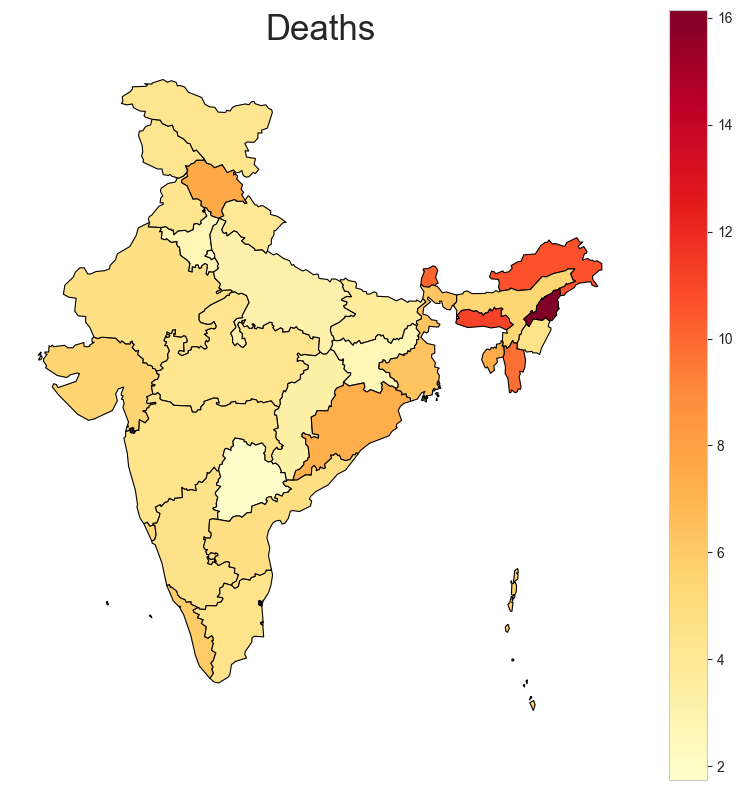

In [147]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Average_Margin',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])